In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import env
import wrangle

## Acquire Data

In [2]:
df = wrangle.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


### Create New Feature

Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

In [3]:
def months_to_years(df):
    """
    Takes in the telco df and returns the df with new 
    categorical feature 'tenure_years'
    """
    df['tenure_years'] = round(df.tenure // 12)
    df['tenure_years'] = df.tenure_years.astype('object')
    return df

In [4]:
df = months_to_years(df)
df.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5
1,0014-BMAQU,84.65,63,5377.80,5
2,0016-QLJIS,90.45,65,5957.90,5
3,0017-DINOC,45.20,54,2460.55,4
4,0017-IUDMW,116.80,72,8456.75,6


In [5]:
df.tenure_years.value_counts()

5    676
6    343
4    265
3    166
2    103
1     83
0     59
Name: tenure_years, dtype: int64

In [6]:
# Validate our data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
 4   tenure_years     1695 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 66.3+ KB


#### Split Data to Explore

In [7]:
# Split into train, validate, and test sets.

train, validate, test = wrangle.split_continuous(df)

train -> (949, 5)
validate -> (407, 5)
test -> (339, 5)


### `.pairplot`

In [8]:
telco_cols = ['monthly_charges', 'tenure', 'total_charges']

In [9]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

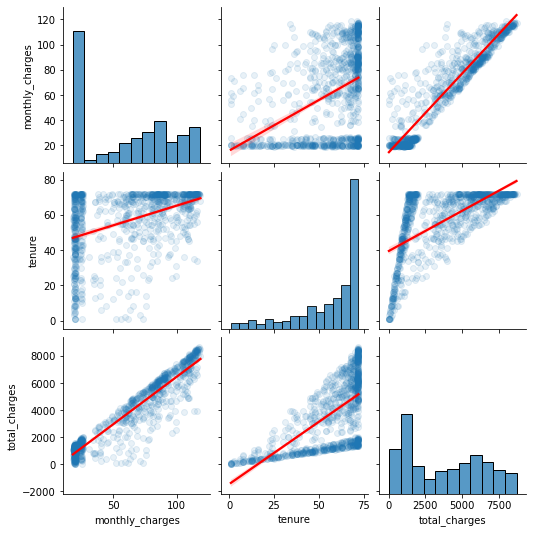

In [10]:
plot_variable_pairs(train, telco_cols)

In [11]:
def plot_pairplot(train, cols, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    sns.pairplot(train[cols], corner=True)
    plt.show()

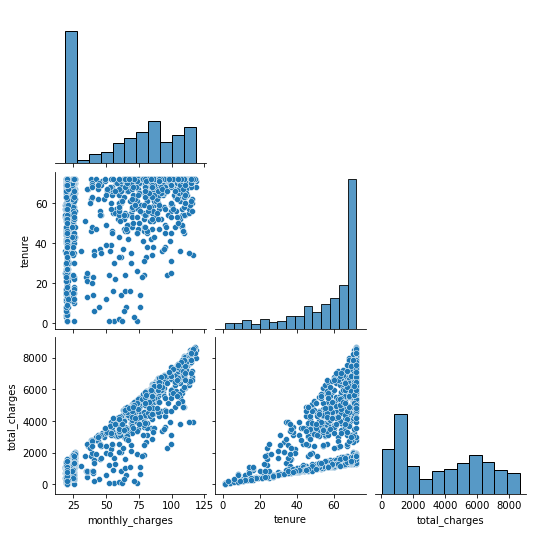

In [12]:
plot_pairplot(train, telco_cols)

### `.heatmap`

In [13]:
train[telco_cols].corr()

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.425131,0.941523
tenure,0.425131,1.000000,0.650237
total_charges,0.941523,0.650237,1.000000


In [14]:
def create_heatmap(train, cols):
    corr_matrix = train[cols].corr()
    
    kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, cmap='Purples', annot=True, **kwargs)
    plt.ylim(0, 3)

    plt.show()

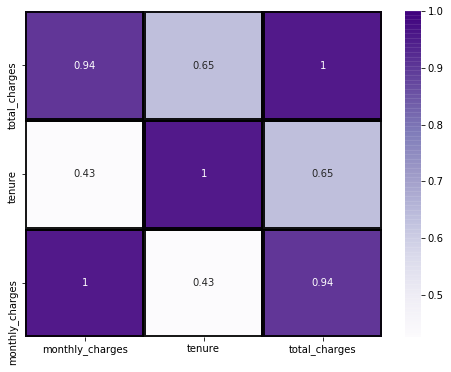

In [15]:
create_heatmap(train, telco_cols)

In [16]:
# Quick check of my Seaborn version installed.

sns.__version__

'0.11.1'

In [17]:
# Quick check of my pandas version installed.

pd.__version__

'1.2.4'

### Convert Data Types

In [18]:
train['tenure_years'] = train.tenure_years.astype('object')
validate['tenure_years'] = validate.tenure_years.astype('object')
test['tenure_years'] = test.tenure_years.astype('object')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 1256 to 1593
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      949 non-null    object 
 1   monthly_charges  949 non-null    float64
 2   tenure           949 non-null    int64  
 3   total_charges    949 non-null    float64
 4   tenure_years     949 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 44.5+ KB


## Plot Categorical and Continous Variables

Write a function that takes in a string name of a categorical variable, a string name from a continuous variable and the df they live in, (categorical_var, continuous_var, df), and outputs 3 different plots for plotting a categorical variable with a continuous variable.

- For Example: tenure_years with total_charges. 


- For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

In [20]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
    """
    This function that takes in a string name of a categorical variable, 
    a string name from a continuous variable and the df they live in and
    displays 4 different plots.
    """
    plt.suptitle(f'{continuous_var} by {categorical_var}', fontsize=18)
    
    sns.lineplot(x=categorical_var, y=continuous_var, data=df)
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind='box', palette='Greens')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="swarm", palette='Blues')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="bar", palette='Purples')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)

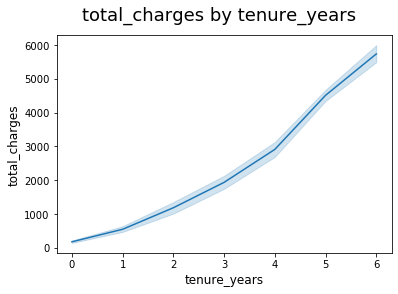

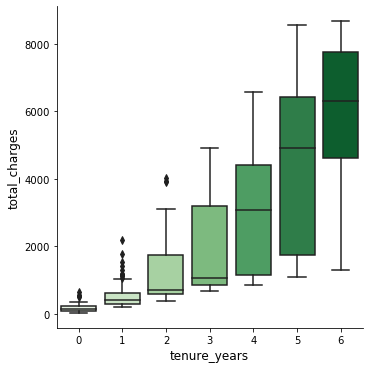

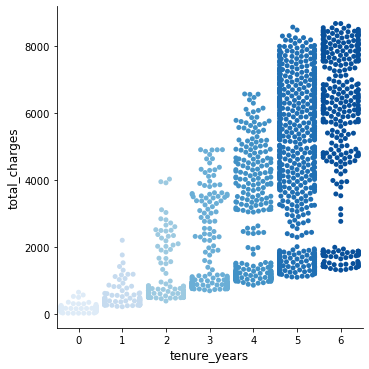

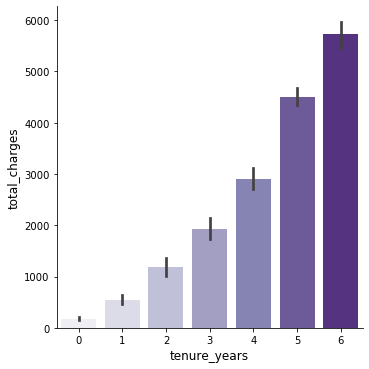

In [21]:
plot_categorical_and_continuous_vars('tenure_years', 'total_charges', df)

## Object Oriented Approach, subplots method

- figure is the container holding our plots

- axes are the actual plots

- so our plot can contain more than one axis

In [22]:
def plot_categorical_and_continuous_vars_telco(df):  
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,10), nrows=3,ncols=1, sharex=True)
    plt.style.use('seaborn-bright')

    plt.suptitle('Total Charges by Tenure Years', fontsize=18)

    ax1.plot(df.tenure_years, df.total_charges, color='mediumblue')
    ax1.set_ylabel('US Dollars', fontsize=14)

    ax2.bar(df.tenure_years, df.total_charges, color='dodgerblue')
    ax2.set_ylabel('US Dollars', fontsize=14)

    ax3.scatter(df.tenure_years, df.total_charges, color='skyblue')
    ax3.set_xlabel('Tenure in Years', fontsize=14)
    ax3.set_ylabel('US Dollars', fontsize=14)

    plt.tight_layout()
    plt.show()

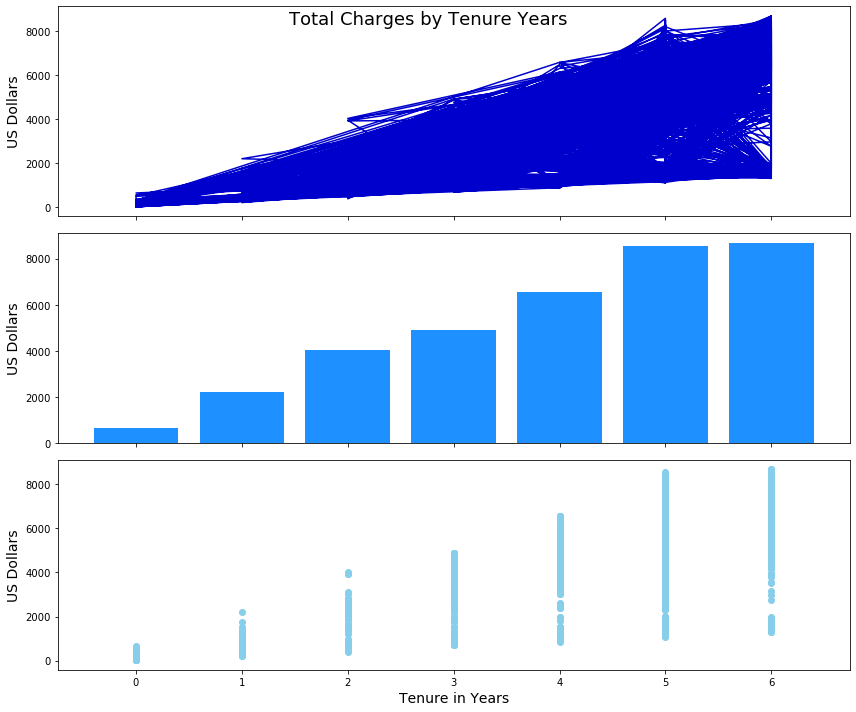

In [23]:
plot_categorical_and_continuous_vars_telco(df)

## How about some pie?

In [24]:
def telco_pie(train):
    plt.style.use('seaborn-paper')
    labels = ['0 years', '1 years', '2 years', '3 years', '4 years', '5 years', '6 years']
    colors = ['dodgerblue', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke']
    explode = (0.1, 0, 0, 0, 0, 0, 0) 
    
    plt.pie(train.tenure_years.value_counts(), explode=explode, colors=colors, labels = labels, autopct='%1.0f%%', shadow=True, textprops={'fontsize':14}, wedgeprops={'edgecolor': 'black', 'width': 0.6})
    plt.title('Percent of Accounts by Tenure Years', fontsize=18)
    plt.show()

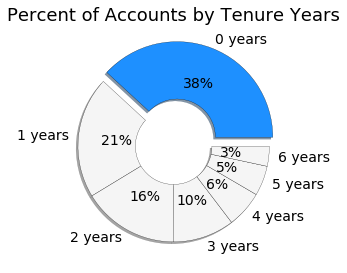

In [25]:
telco_pie(train)

## Correlation Function

In [26]:
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()

The p-value is: 3.846308286137554e-115. There is 0.0% chance that we see these results by chance.
r = 0.65


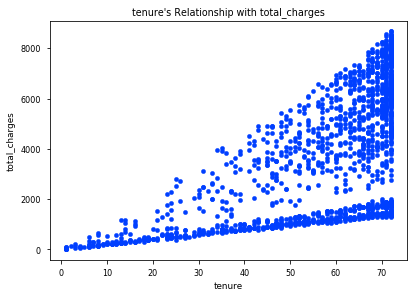

In [27]:
correlation_exploration(train, 'tenure', 'total_charges')